## COVID19-eng.csv load and examine

https://www150.statcan.gc.ca/n1/pub/13-26-0003/132600032020001-eng.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
np.__version__, pd.__version__, mpl.__version__
# ('1.19.2', '1.2.2')

('1.19.2', '1.2.2', '3.3.4')

In [3]:
yyyymmdd = '2021-03-04'
csvFileName = 'data/COVID19-eng-' +  yyyymmdd + '.csv'
covid19 = pd.read_csv(csvFileName, 
                      header=0, 
                      index_col='Case identifier number')

In [4]:
covid19.head(10)

,Region,Episode week,Episode week group,Episode year,Gender,Age group,Occupation,Asymptomatic,Onset week of symptoms,Onset year of symptoms,Hospital status,Recovered,Recovery week,Recovery year,Death,Transmission
Case identifier number,,,,,,,,,,,,,,,,
1,3,2,0,21,1,2,9,9,99,99,9,1,99,99,2,9
2,2,3,0,21,2,2,1,2,3,21,3,1,3,21,2,1
3,2,3,0,21,1,1,4,1,99,99,3,1,4,21,2,1
4,3,35,0,20,1,3,4,2,35,20,9,1,99,99,2,1
5,2,46,0,20,2,8,4,2,46,20,3,1,48,20,2,1
6,2,52,0,20,1,5,4,1,99,99,3,1,99,99,2,1
7,3,39,0,20,1,1,4,9,39,20,3,1,99,99,2,9
8,3,42,0,20,1,2,4,2,42,20,3,1,99,99,2,1
9,2,52,0,20,1,5,4,2,52,20,3,1,99,99,2,1


In [5]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839926 entries, 1 to 839926
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Region                  839926 non-null  int64
 1   Episode week            839926 non-null  int64
 2   Episode week group      839926 non-null  int64
 3   Episode year            839926 non-null  int64
 4   Gender                  839926 non-null  int64
 5   Age group               839926 non-null  int64
 6   Occupation              839926 non-null  int64
 7   Asymptomatic            839926 non-null  int64
 8   Onset week of symptoms  839926 non-null  int64
 9   Onset year of symptoms  839926 non-null  int64
 10  Hospital status         839926 non-null  int64
 11  Recovered               839926 non-null  int64
 12  Recovery week           839926 non-null  int64
 13  Recovery year           839926 non-null  int64
 14  Death                   839926 non-null  int64
 15  

In [6]:
for column in enumerate(['Region','Episode week group','Episode year','Gender','Age group','Occupation','Asymptomatic','Hospital status','Recovered', 'Death', 'Transmission']):
    print(column[1], '=>', covid19[column[1]].unique().tolist())

Region => [3, 2, 4, 5, 1]
Episode week group => [0, 4, 5, 1, 2, 3]
Episode year => [21, 20, 99]
Gender => [1, 2, 9]
Age group => [2, 1, 3, 8, 5, 4, 6, 7, 99]
Occupation => [9, 1, 4, 2, 3]
Asymptomatic => [9, 2, 1]
Hospital status => [9, 3, 2, 1]
Recovered => [1, 9, 2]
Death => [2, 9, 1]
Transmission => [9, 1, 2]


In [7]:
region = { 1:'Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador)', 2:'Quebec', 3:'Ontario and Nunavut', 4:'Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories', 5:'British Columbia and Yukon'}
gender = {1:'Male', 2:'Female', 9:'Not Stated/Other'}
ageGroup = {1:'0-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80+', 99:'Not Stated'}
occupation = {1:'Health Care Worker', 2:'School or daycare worker/attendee', 3:'Long Term Care Resident', 4:'Other', 9:'Not Stated'}
asymptomatic = {1:'Yes', 2:'No', 9:'Not Stated'}
hospitalStatus = {1:'Hospitalized - ICU', 2:'Hospitalized - Non-ICU', 3:'Not Hospitalized', 9:'Not Stated/Unknown'}
recovered = {1:'Yes', 2:'No', 9:'Not Stated/Unknown'}
death = {1:'Yes', 2:'No', 9:'Not Stated'}
transmission = {1:'Domestic Acquisition: “Contact of COVID Case” or “Contact with traveler” or “Unknown Source”', 2:'International Travel', 9:'Not Stated/Pending'}

In [8]:
# https://www.geeksforgeeks.org/creating-a-sqlite-database-from-csv-with-python/

createDb = True

if createDb:
    
    import sqlite3
    # Connect to SQLite database 
    conn = sqlite3.connect(r'COVID19-eng.db') 
    # Write the data to a sqlite table 
    covid19.to_sql(yyyymmdd, conn, if_exists='replace', index=False) 
    # Close connection to SQLite database 
    conn.close() 
    
    

# # Import required libraries 
# import sqlite3 
# import pandas as pd 

# # Connect to SQLite database 
# conn = sqlite3.connect(r'covid19.db') 

# # Load CSV data into Pandas DataFrame 
# # stud_data = pd.read_csv('stud_data.csv') 
# # Write the data to a sqlite table 
# covid19.to_sql('covid', conn, if_exists='replace', index=False) 

# # Create a cursor object 
# # cur = conn.cursor()
# # Fetch and display result 
# # for row in cur.execute('SELECT * FROM covid'): 
# # 	print(row) 
# # Close connection to SQLite database 
# conn.close() 




/home/rob/anaconda3/envs/covid19/lib/python3.8/site-packages/pandas/core/generic.py:2778: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [ ]:
# 1) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 4:34pm

In [ ]:
# 2) This is on KAUWITB in the MacBookPro branch, Friday, March 5, 2021, 4:43pm

In [ ]:
# 3) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 4:59pm

In [ ]:
# 4) This is on KAUWITB in the KAUWITB branch, Friday, March 5, 2021 5:08pm ... how can I set main so that no one
#    can update it directly, but has to update from a branch??

Let's start with the weekly trend of cases.

In [9]:
weeklyCaseCount = covid19.groupby(['Episode year','Episode week'])['Region'].count().reset_index()
# remove where Episode week = 99
weeklyCaseCount.drop(weeklyCaseCount.loc[weeklyCaseCount['Episode week'] == 99].index, inplace=True)
# add a YearWeek column
weeklyCaseCount['YearWeek'] = '20' + weeklyCaseCount['Episode year'].astype(str) + '-' + weeklyCaseCount['Episode week'].astype(str)
weeklyCaseCount.head()

,Episode year,Episode week,Region,YearWeek
0,20,8,108,2020-8
1,20,9,313,2020-9
2,20,10,2052,2020-10
3,20,11,5610,2020-11
4,20,12,6175,2020-12


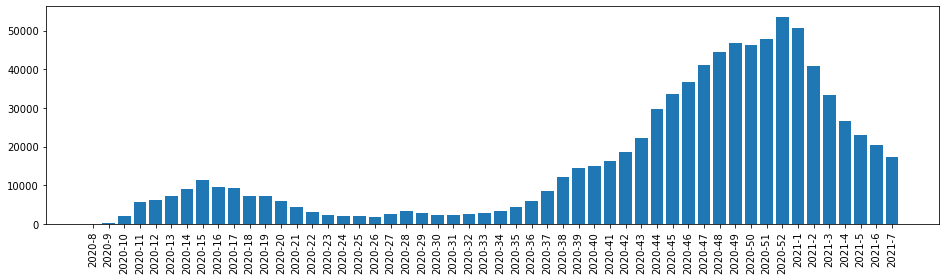

In [10]:
from matplotlib import pyplot as plt

xAxis = weeklyCaseCount['YearWeek']
yAxis = weeklyCaseCount['Region']
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.show()

In [11]:
covid19.loc[covid19['Death']==1].count()

Region                    21420
Episode week              21420
Episode week group        21420
Episode year              21420
Gender                    21420
Age group                 21420
Occupation                21420
Asymptomatic              21420
Onset week of symptoms    21420
Onset year of symptoms    21420
Hospital status           21420
Recovered                 21420
Recovery week             21420
Recovery year             21420
Death                     21420
Transmission              21420
dtype: int64

In [12]:
weeklyDeathCount = covid19.loc[covid19['Death']==1].groupby(['Episode year','Episode week'])['Region'].count().reset_index()
# remove where Episode week = 99
weeklyDeathCount.drop(weeklyDeathCount.loc[weeklyDeathCount['Episode week'] == 99].index, inplace=True)
# add a YearWeek column
weeklyDeathCount['YearWeek'] = '20' + weeklyDeathCount['Episode year'].astype(str) + '-' + weeklyDeathCount['Episode week'].astype(str)
weeklyDeathCount.head()

,Episode year,Episode week,Region,YearWeek
0,20,9,2,2020-9
1,20,10,44,2020-10
2,20,11,194,2020-11
3,20,12,412,2020-12
4,20,13,838,2020-13


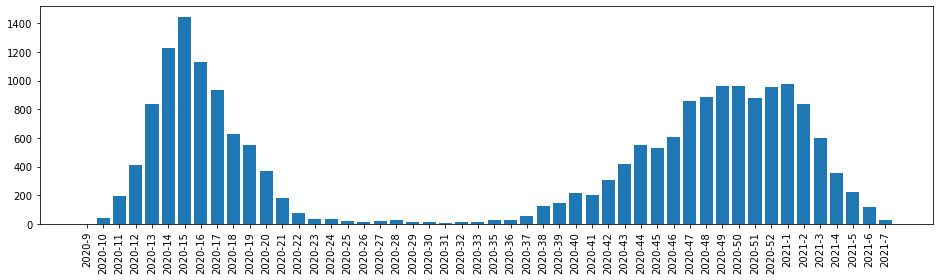

In [13]:
xAxis = weeklyDeathCount['YearWeek']
yAxis = weeklyDeathCount['Region']
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.show()

In [14]:
ageRestrictedDeathCount = covid19.loc[(covid19['Death']==1) & (covid19['Age group'].isin([1,2,3,4,5,6,7,8,9]))].groupby(['Episode year','Episode week'])['Region'].count().reset_index()
# remove where Episode week = 99
ageRestrictedDeathCount.drop(ageRestrictedDeathCount.loc[ageRestrictedDeathCount['Episode week'] == 99].index, inplace=True)
# add a YearWeek column
ageRestrictedDeathCount['YearWeek'] = '20' + ageRestrictedDeathCount['Episode year'].astype(str) + '-' + ageRestrictedDeathCount['Episode week'].astype(str)

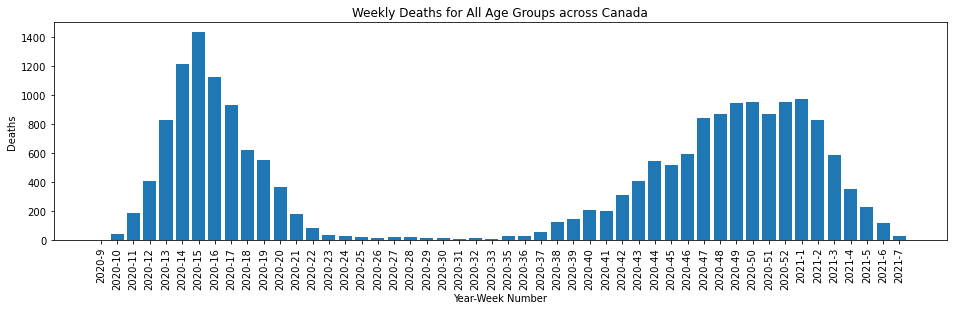

In [15]:
xAxis = ageRestrictedDeathCount['YearWeek']
yAxis = ageRestrictedDeathCount['Region']
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(range(len(xAxis)), xAxis)
plt.xticks(rotation=90)
plt.xlabel("Year-Week Number")
plt.ylabel("Deaths")
plt.ylim((0,1500))
plt.title('Weekly Deaths for All Age Groups across Canada')
plt.show()

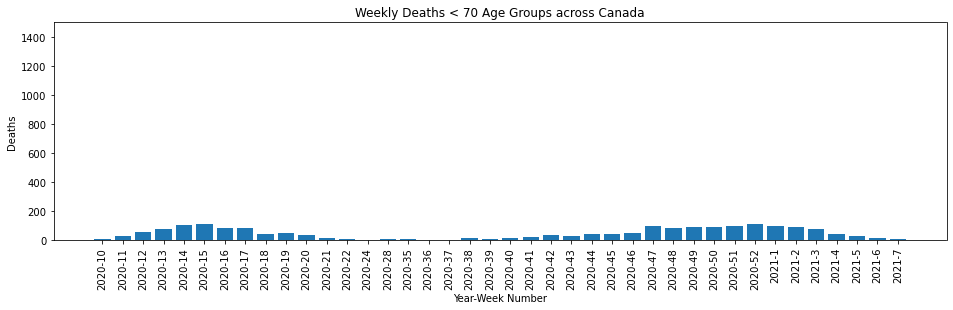

In [16]:
ageRestrictedDeathCount = covid19.loc[(covid19['Death']==1) & (covid19['Age group'].isin([1,2,3,4,5,6]))].groupby(['Episode year','Episode week'])['Region'].count().reset_index()
# remove where Episode week = 99
ageRestrictedDeathCount.drop(ageRestrictedDeathCount.loc[ageRestrictedDeathCount['Episode week'] == 99].index, inplace=True)
# add a YearWeek column
ageRestrictedDeathCount['YearWeek'] = '20' + ageRestrictedDeathCount['Episode year'].astype(str) + '-' + ageRestrictedDeathCount['Episode week'].astype(str)

xAxis = ageRestrictedDeathCount['YearWeek']
yAxis = ageRestrictedDeathCount['Region']
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.xlabel("Year-Week Number")
plt.ylabel("Deaths")
plt.ylim((0,1500))
plt.title('Weekly Deaths < 70 Age Groups across Canada')
plt.show()



### Hospitalization Rates

In [17]:
groupBy = ['Gender','Age group']
countColumn = 'Region'
totalCases = covid19.groupby(groupBy)[[countColumn]].count().reset_index()
totalCases.rename(columns = {countColumn:'Total Cases'}, inplace = True)
totalCases.head()

,Gender,Age group,Total Cases
0,1,1,71229
1,1,2,79406
2,1,3,65613
3,1,4,58059
4,1,5,54972


In [18]:
totalHospitalized = covid19.loc[(covid19['Hospital status'].isin([1,2]))].groupby(groupBy)[[countColumn]].count().reset_index()
totalHospitalized.rename(columns = {countColumn:'Total Hospitalized'}, inplace = True)
totalHospitalized.head()

,Gender,Age group,Total Hospitalized
0,1,1,344
1,1,2,588
2,1,3,1065
3,1,4,1821
4,1,5,3446


In [19]:
totalNotHospitalized = covid19.loc[(covid19['Hospital status'].isin([3]))].groupby(groupBy)[[countColumn]].count().reset_index()
totalNotHospitalized.rename(columns = {countColumn:'Total Not Hospitalized'}, inplace = True)
totalNotHospitalized.head()

,Gender,Age group,Total Not Hospitalized
0,1,1,52946
1,1,2,51110
2,1,3,44784
3,1,4,40071
4,1,5,34691


In [20]:
totalHospitalizedNSU = covid19.loc[(covid19['Hospital status'].isin([9]))].groupby(groupBy)[[countColumn]].count().reset_index()
totalHospitalizedNSU.rename(columns = {countColumn:'Total Not Stated/Unkown'}, inplace = True)
totalHospitalizedNSU.head()

,Gender,Age group,Total Not Stated/Unkown
0,1,1,17939
1,1,2,27708
2,1,3,19764
3,1,4,16167
4,1,5,16835


In [21]:
# merge these datasets into a single dataset
# totalCases, totalHospitalized, totalNotHospitalized, totalHospitalizedNSU
hospitalDf = pd.merge(totalCases, totalHospitalized, on=['Gender','Age group'], how='inner')
hospitalDf = pd.merge(hospitalDf, totalNotHospitalized, on=['Gender','Age group'], how='inner')
hospitalDf = pd.merge(hospitalDf, totalHospitalizedNSU, on=['Gender','Age group'], how='inner')
hospitalDf.head()

,Gender,Age group,Total Cases,Total Hospitalized,Total Not Hospitalized,Total Not Stated/Unkown
0,1,1,71229,344,52946,17939
1,1,2,79406,588,51110,27708
2,1,3,65613,1065,44784,19764
3,1,4,58059,1821,40071,16167
4,1,5,54972,3446,34691,16835


In [22]:
hospitalDf.head(32)

,Gender,Age group,Total Cases,Total Hospitalized,Total Not Hospitalized,Total Not Stated/Unkown
0,1,1,71229,344,52946,17939
1,1,2,79406,588,51110,27708
2,1,3,65613,1065,44784,19764
3,1,4,58059,1821,40071,16167
4,1,5,54972,3446,34691,16835
5,1,6,37040,4709,21512,10819
6,1,7,20524,5535,10380,4609
7,1,8,20561,6997,10222,3342
8,1,99,339,149,140,50
9,2,1,66957,329,50199,16429


In [23]:
# target genders, agegroups
genderIds = [1,2]
ageGroupId = [1,2,3,4,5,6,7,8]
hospitalizationDf = hospitalDf.loc[(hospitalDf['Gender'].isin(genderIds)) & (hospitalDf['Age group'].isin(ageGroupId))].groupby(['Age group']).sum().reset_index()
hospitalizationDf.head(10)

,Age group,Gender,Total Cases,Total Hospitalized,Total Not Hospitalized,Total Not Stated/Unkown
0,1,3,138186,673,103145,34368
1,2,3,156660,1454,103128,52078
2,3,3,133829,2363,92555,38911
3,4,3,122886,3204,85218,34464
4,5,3,113022,5699,72301,35022
5,6,3,71493,7828,42697,20968
6,7,3,41523,9858,22097,9568
7,8,3,60013,15530,33685,10798


In [24]:
totalNotHospitalized = np.array(list(hospitalizationDf['Total Not Hospitalized']))
totalHospitalizedNSU = np.array(list(hospitalizationDf['Total Not Stated/Unkown']))
totalHospitalized = np.array(list(hospitalizationDf['Total Hospitalized']))

In [25]:
xLabels = list(ageGroup.values())[:8]
print(xLabels)
# genderIds = [1,2]
# ageGroupId = [1,2,3,4,5,6,7,8]
# totalCases = list((hospitalDf.loc[(hospitalDf['Gender'].isin(genderIds))])['Total Cases'])
# print(totalCases)
# totalNotHospitalized = list((hospitalDf.loc[(hospitalDf['Gender'].isin(genderIds))])['Total Not Hospitalized'])
# print(totalNotHospitalized)
# totalHospitalized = list((hospitalDf.loc[(hospitalDf['Gender'].isin(genderIds))])['Total Hospitalized'])
# print(totalHospitalized)
# totalHospitalizedNSU = list((hospitalDf.loc[(hospitalDf['Gender'].isin(genderIds))])['Total Not Stated/Unkown'])
# print(totalHospitalizedNSU)


['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']


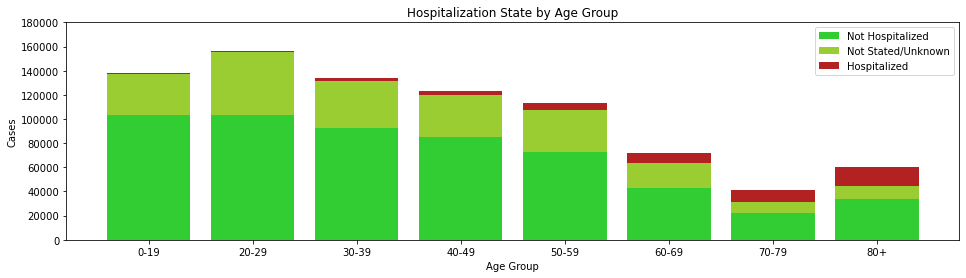

In [26]:
from matplotlib import pyplot as plt

count = 8
pos = range(count)

A = totalNotHospitalized
B = totalHospitalizedNSU
C = totalHospitalized

plt.figure(figsize=(16,4))
plt.bar(pos, A, color='limegreen', label='Not Hospitalized')
plt.bar(pos, B, bottom=A, color='yellowgreen', label='Not Stated/Unknown')
plt.bar(pos, C, bottom=A+B, color='firebrick', label='Hospitalized')
plt.xticks(pos, xLabels)
plt.xlabel('Age Group')
plt.ylabel("Cases")
plt.ylim((0,180000))
plt.title('Hospitalization State by Age Group')
plt.legend()
#plt.bar(pos, totalHospitalized, bottom=totalHospitalizedNSU + totalNotHospitalized)
#plt.bar(pos, totalHospitalized, bottom=totalNotHospitalized + totalHospitalizedNSU, width=barWidth)
plt.show()

The stuff below here is the original crap that can probably be removed.

In [ ]:
groupBy = ['Region', 'Gender','Age group']
totalCases = covid19.groupby(groupBy)[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True)

totalDeaths = covid19.loc[covid19['Death']==1].groupby(groupBy)[['Region']].count()
totalDeaths.rename(columns = {'Region':'Deaths'}, inplace = True) 

notHospitalized = covid19.loc[covid19['Hospital status']==3].groupby(groupBy)[['Region']].count()
notHospitalized.rename(columns = {'Region':'Not Hospitalized'}, inplace = True) 

hospitalized = covid19.loc[(covid19['Hospital status'].isin([1,2]))].groupby(groupBy)[['Region']].count()
hospitalized.rename(columns = {'Region':'Hospitalized'}, inplace = True) 


regionGenderAgeGroup = pd.merge(totalCases, notHospitalized, on=groupBy, how='outer')
regionGenderAgeGroup = pd.merge(regionGenderAgeGroup, hospitalized, on=groupBy, how='outer')
regionGenderAgeGroup = pd.merge(regionGenderAgeGroup, totalDeaths, on=groupBy, how='outer')

regionGenderAgeGroup = regionGenderAgeGroup.fillna(0)

regionGenderAgeGroup['Deaths'] = regionGenderAgeGroup['Deaths'].astype(int)
regionGenderAgeGroup['Not Hospitalized'] = regionGenderAgeGroup['Not Hospitalized'].astype(int)
regionGenderAgeGroup['Hospitalized'] = regionGenderAgeGroup['Hospitalized'].astype(int)

regionGenderAgeGroup.head(10)

In [ ]:
regionGenderAgeGroup.to_csv('regionGenderAgeGroup.csv')

In [ ]:
# Number of cases
totalCases = covid19.groupby(['Gender','Age group','Region'])[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True) 
totalCases.head(50)




In [ ]:
# Number of cases
totalCases = covid19.groupby(['Gender','Age group'])[['Region']].count()
totalCases.rename(columns = {'Region':'Cases'}, inplace = True) 
totalCases.head(50)

In [ ]:
# Number of deaths 
totalDeaths = covid19.loc[covid19['Death']==1].groupby(['Gender','Age group'])[['Region']].count()
totalDeaths.rename(columns = {'Region':'Deaths'}, inplace = True) 
totalDeaths.head(50)

In [ ]:
# Number NOT hospitalized
notHospitalized = covid19.loc[covid19['Hospital status']==3].groupby(['Gender','Age group'])[['Region']].count()
notHospitalized.rename(columns = {'Region':'Not Hospitalized'}, inplace = True) 
notHospitalized.head(50)

In [ ]:
# Hospitalized in the ICU or not in the ICU ... 
hospitalized = covid19.loc[(covid19['Hospital status']==1) | (covid19['Hospital status']==2)].groupby(['Gender','Age group'])[['Region']].count()
hospitalized.rename(columns = {'Region':'Hospitalized'}, inplace = True) 
hospitalized.head(50)

In [ ]:
genderAge = pd.merge(totalCases, notHospitalized, on=['Gender','Age group'], how='outer')
genderAge = pd.merge(genderAge, hospitalized, on=['Gender','Age group'], how='outer')
genderAge = pd.merge(genderAge, totalDeaths, on=['Gender','Age group'], how='outer')

genderAge = genderAge.fillna(0)

genderAge['Hospitalized'] = genderAge['Hospitalized'].astype(int)
genderAge['Deaths'] = genderAge['Deaths'].astype(int)

genderAge['% Not Hospitalized'] = (genderAge['Not Hospitalized'] / genderAge['Cases']) * 100
genderAge['% Hospitalized'] = (genderAge['Hospitalized'] / genderAge['Cases']) * 100
genderAge['% Deaths'] = (genderAge['Deaths'] / genderAge['Cases']) * 100

genderAge.head(50)

In [ ]:
# Cases 	Not Hospitalized 	Hospitalized 	Deaths 	% Not Hospitalized 	% Hospitalized 	% Deaths
genderAge2 = genderAge[['Cases', 'Not Hospitalized', '% Not Hospitalized', 'Hospitalized', '% Hospitalized', 'Deaths', '% Deaths']] 
genderAge2.head(50)

In [ ]:
covid19.describe()

Create dictionaries for some of the numeric fields.

In [ ]:
region = { 1:'Atlantic (New Brunswick, Nova Scotia, Prince Edward Island, Newfoundland and Labrador)', 2:'Quebec', 3:'Ontario and Nunavut', 4:'Prairies (Manitoba, Saskatchewan, Alberta) and the Northwest Territories', 5:'British Columbia and Yukon'}
gender = {1:'Male', 2:'Female', 9:'Not Stated/Other'}
ageGroup = {1:'0-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80+', 99:'Not Stated'}
occupation = {1:'Health Care Worker', 2:'School or daycare worker/attendee', 3:'Long Term Care Resident', 4:'Other', 9:'Not Stated'}
asymptomatic = {1:'Yes', 2:'No', 9:'Not Stated'}
sympton = {1:'Yes', 2:'No', 9:'Not Stated'}
hospitalStatus = {1:'Hospitalized - ICU', 2:'Hospitalized - Non-ICU', 3:'Not Hospitalized', 9:'Not Stated/Unknown'}
recovered = {1:'Yes', 2:'No', 9:'Not Stated/Unknown'}
death = {1:'Yes', 2:'No', 9:'Not Stated'}
transmission = {1:'Domestic Acquisition: “Contact of COVID Case” or “Contact with traveler” or “Unknown Source”', 2:'International Travel', 9:'Not Stated/Pending'}

In [ ]:
allMales = covid19.loc[covid19['Gender']==1]
allFemales = covid19.loc[covid19['Gender']==2]
allGenderNotstated = covid19.loc[covid19['Gender']==9]
malesCount = len(allMales)
femalesCount = len(allFemales)
genderNotstatedCount = len(allGenderNotstated)

In [ ]:
len(covid19) - (malesCount + femalesCount) == genderNotstatedCount

In [ ]:
allMales['Row1'] = 1

In [ ]:
allMales.head(25)

In [ ]:
allMales.groupby('Age group').sum()

In [ ]:
allMales.groupby('Age group').count()

In [ ]:
allMales.groupby(['Gender','Age group']).count()